In [2]:
# IMPORTS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer,one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation,Reshape, Dropout, Dense, Flatten, Conv1D, GlobalMaxPooling1D, LSTM, Embedding,GRU,MaxPooling1D
from sklearn.model_selection import train_test_split
from gensim.models.keyedvectors import KeyedVectors
from sklearn.feature_extraction.text import TfidfVectorizer


## Dataset importation :

In [5]:
dataset=pd.read_csv('/content/IMDB-Dataset.csv')
print('dataset dimensions :',dataset.shape)
print("Checking for NULL values:\n ", dataset.isnull().sum())
dataset.head()


dataset dimensions : (50000, 2)
Checking for NULL values:
  review       0
sentiment    0
dtype: int64


review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

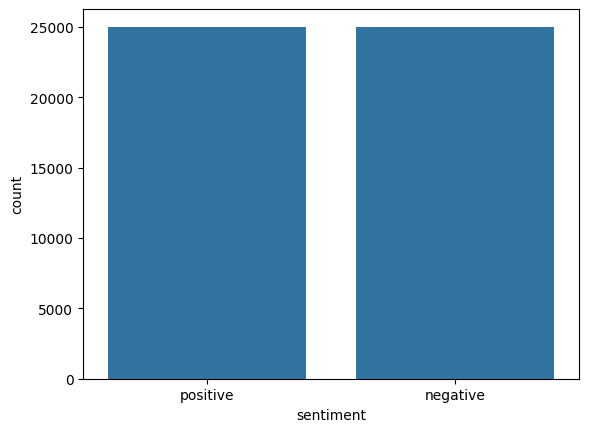

In [6]:
sns.countplot(x='sentiment', data=dataset)
plt.show()

In [7]:
print(dataset.iloc[3]['review'])

Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.


Nous remarquons que le review contient des tag html innécessaires

## Data preprocessing :

In [8]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    return TAG_RE.sub('', text)

La fonction remove_tags utilise une expression régulière pour supprimer toutes les balises HTML d'un texte

La fonction preprocess_text fait plusieurs choses pour nettoyer le texte :

- Tout d'abord, elle supprime les balises HTML du texte d'entrée en appelant la fonction remove_tags.

- Ensuite, elle supprime tous les caractères qui ne sont pas des alphabets en utilisant la fonction re.sub avec l'expression régulière [^a-zA-Z]. Cela supprime également les chiffres et la ponctuation du texte.

- Ensuite, elle supprime tous les caractères uniques seuls. L'expression régulière \s+[a-zA-Z]\s+ correspond à un seul caractère alphabétique entouré d'espaces.

- Enfin, elle supprime tous les espaces multiples. L'expression régulière \s+ correspond à un ou plusieurs espaces.



In [9]:
X = []
sentences = list(dataset['review'])
for sen in sentences:
    X.append(preprocess_text(sen))
print(X[3])

Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them 


On remarque maintenant que le review est nettoyé et ne contient pas des tags et des informations innécessaires

In [10]:
# Convert 'positive' into 1 and 'negative' into 0 in the sentiment column
y = dataset['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [32]:
# split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.20, random_state=42)


In [33]:
# Tokenize the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_train

[[9,
  43,
  786,
  2121,
  524,
  299,
  1,
  104,
  1860,
  1989,
  4281,
  2,
  782,
  4786,
  9,
  1,
  224,
  1,
  77,
  763,
  51,
  49,
  17,
  97,
  3,
  1,
  24,
  1968,
  98,
  31,
  23,
  32,
  116,
  1101,
  9,
  6,
  5,
  2323,
  1163,
  4,
  449,
  43,
  540,
  4,
  88,
  28,
  20,
  37,
  892,
  397,
  13,
  1,
  154,
  4,
  2935,
  22,
  4318,
  18,
  2897,
  9,
  42,
  71,
  218,
  69,
  123,
  7,
  76,
  3100,
  193,
  18,
  232,
  2,
  1,
  427,
  198,
  4888,
  147,
  19,
  60,
  24,
  13,
  70,
  358,
  299,
  16,
  15,
  6,
  198,
  25,
  302,
  9,
  11,
  1,
  1820,
  112,
  413,
  2,
  11,
  1,
  1651,
  562,
  67,
  419,
  373,
  82,
  114,
  43,
  110,
  361,
  28,
  33,
  15,
  41,
  10,
  88,
  441,
  13,
  357,
  1145,
  59,
  7,
  1,
  460,
  214,
  992,
  4,
  4124,
  7,
  174,
  3,
  32,
  433,
  680,
  607,
  9,
  66,
  227,
  233,
  107,
  830,
  33,
  169,
  27,
  217,
  9,
  1,
  423,
  360,
  53,
  3696,
  273,
  157,
  1672,
  187,
  5,
  1,
  711,

In [34]:
# equalising the length of all reviews sentences
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
print("Vocab_Size: ", vocab_size)
X_train

Vocab_Size:  92547


array([[   4,    1,  296, ...,  198,  345, 3812],
       [   1,  412,  100, ...,   82,   99,    6],
       [ 128, 1307,  108, ...,    0,    0,    0],
       ...,
       [ 778,    8,   24, ...,    0,    0,    0],
       [   8,  347,   10, ...,    0,    0,    0],
       [ 274,  100,  121, ...,   67,   69, 1946]], dtype=int32)

In [35]:
# Create the embeddings_dictionary from GloVe (each word corresponds to a list of integers which is the embedding)
embeddings_dictionary = dict()
glove_file = open("/content/sample_data/glove.6B.100d.txt", encoding="utf8")
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:],dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()
embeddings_dictionary

{'the': array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
        -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
         0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
        -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
         0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
        -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
         0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
         0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
        -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
        -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
        -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
        -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
        -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
        -1.2526  ,  0.071624,  

In [ ]:
# Create the embedding matrix in which each word from our corpus have its embedding
embedding_matrix = np.zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
embedding_matrix

## A. Classification avec un simple réseau de neurones

In [37]:
# Créer une instance du modèle Sequential
model = Sequential()
# Ajouter la couche d'Embedding
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix],input_length=maxlen , trainable=False))

# Ajouter la couche Flatten
model.add(Flatten())

# Ajouter la couche Dense
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Afficher un résumé du modèle
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          9254700   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 1)                 10001     
                                                                 
Total params: 9264701 (35.34 MB)
Trainable params: 10001 (39.07 KB)
Non-trainable params: 9254700 (35.30 MB)
_________________________________________________________________


In [38]:

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 3s 8ms/step - loss: 0.6231 - acc: 0.6548 - val_loss: 0.5690 - val_acc: 0.6990
Epoch 2/6
250/250 [==============================] - 3s 10ms/step - loss: 0.5176 - acc: 0.7471 - val_loss: 0.5495 - val_acc: 0.7188
Epoch 3/6
250/250 [==============================] - 3s 11ms/step - loss: 0.4827 - acc: 0.7702 - val_loss: 0.5524 - val_acc: 0.7201
Epoch 4/6
250/250 [==============================] - 2s 7ms/step - loss: 0.4603 - acc: 0.7846 - val_loss: 0.5529 - val_acc: 0.7264
Epoch 5/6
250/250 [==============================] - 2s 6ms/step - loss: 0.4486 - acc: 0.7913 - val_loss: 0.5539 - val_acc: 0.7239
Epoch 6/6
250/250 [==============================] - 2s 7ms/step - loss: 0.4348 - acc: 0.7983 - val_loss: 0.5630 - val_acc: 0.7205


In [39]:
def evaluate(model):
  score = model.evaluate(X_test, y_test, verbose=1)
  print("Test Score:", score[0])
  print("Test Accuracy:", score[1])
evaluate(model)

313/313 [==============================] - 1s 2ms/step - loss: 0.5655 - acc: 0.7213
Test Score: 0.5655431747436523
Test Accuracy: 0.7213000059127808


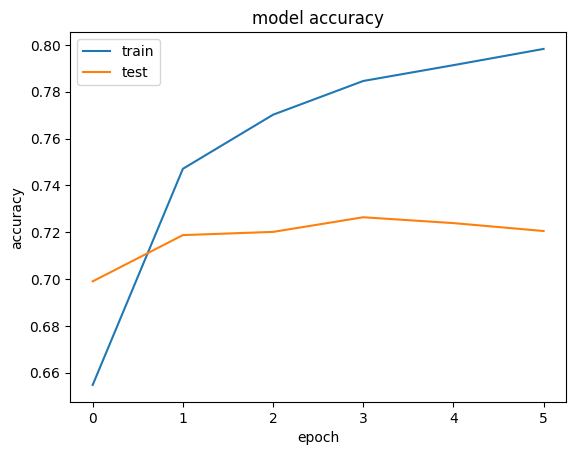

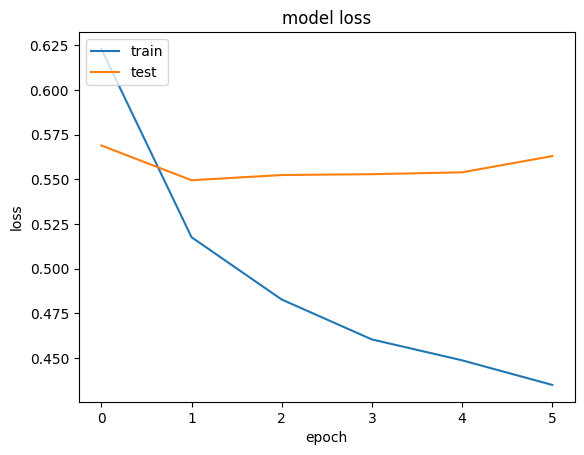

In [40]:
def plot_history(history):
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','test'], loc='upper left')
  plt.show()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','test'], loc='upper left')
  plt.show()
plot_history(history)

Remarque : the model begin to overfit

## B. Classification avec un réseau de neurones convolutionnel



In [41]:
model_CNN=Sequential()
model_CNN.add(Embedding(vocab_size, 100, weights=[embedding_matrix],input_length=maxlen , trainable=False))
model_CNN.add(Conv1D(128,5,activation='relu'))
model_CNN.add(GlobalMaxPooling1D())
model_CNN.add(Dense(1,activation='sigmoid'))
model_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          9254700   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9318957 (35.55 MB)
Trainable params: 64257 (251.00 KB)
Non-trainable params: 9254700 (35.30 MB)
_________________________________________________________________


In [42]:
model_CNN.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [43]:
history_CNN=model_CNN.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 28s 109ms/step - loss: 0.5369 - acc: 0.7277 - val_loss: 0.4254 - val_acc: 0.8054
Epoch 2/6
250/250 [==============================] - 27s 109ms/step - loss: 0.4019 - acc: 0.8196 - val_loss: 0.3924 - val_acc: 0.8190
Epoch 3/6
250/250 [==============================] - 28s 111ms/step - loss: 0.3524 - acc: 0.8463 - val_loss: 0.3827 - val_acc: 0.8282
Epoch 4/6
250/250 [==============================] - 31s 126ms/step - loss: 0.3101 - acc: 0.8694 - val_loss: 0.3848 - val_acc: 0.8260
Epoch 5/6
250/250 [==============================] - 28s 111ms/step - loss: 0.2728 - acc: 0.8933 - val_loss: 0.3733 - val_acc: 0.8341
Epoch 6/6
250/250 [==============================] - 28s 112ms/step - loss: 0.2422 - acc: 0.9085 - val_loss: 0.3956 - val_acc: 0.8248


In [44]:
evaluate(model_CNN)

313/313 [==============================] - 4s 11ms/step - loss: 0.3930 - acc: 0.8242
Test Score: 0.39298632740974426
Test Accuracy: 0.8241999745368958


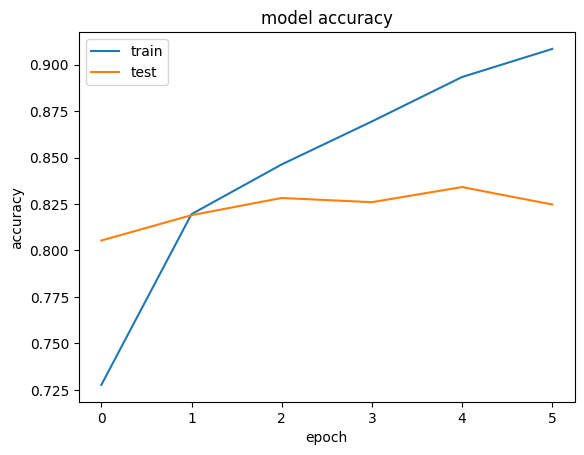

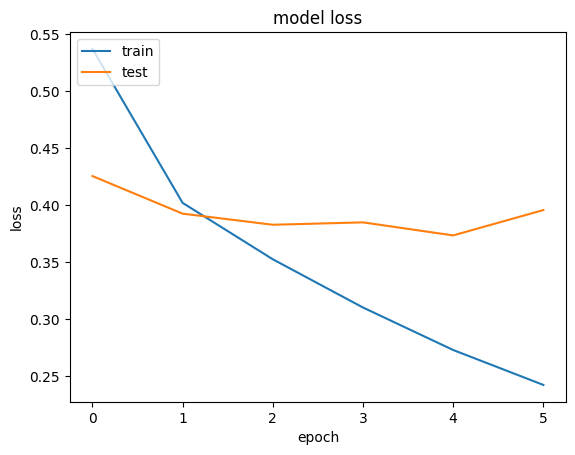

In [45]:
plot_history(history_CNN)

## C. Classification avec un réseau de neurones récurrent (LSTM)

In [46]:
model_LSTM=Sequential()
model_LSTM.add(Embedding(vocab_size, 100, weights=[embedding_matrix],input_length=maxlen , trainable=False))
model_LSTM.add(LSTM(128))
model_LSTM.add(Dense(1,activation='sigmoid'))

In [47]:
model_LSTM.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          9254700   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9372077 (35.75 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 9254700 (35.30 MB)
_________________________________________________________________


In [48]:
model_LSTM.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [49]:
history_LSTM=model_LSTM.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 93s 362ms/step - loss: 0.5804 - acc: 0.6876 - val_loss: 0.4902 - val_acc: 0.7653
Epoch 2/6
250/250 [==============================] - 91s 364ms/step - loss: 0.4906 - acc: 0.7633 - val_loss: 0.4425 - val_acc: 0.7920
Epoch 3/6
250/250 [==============================] - 89s 355ms/step - loss: 0.4427 - acc: 0.7919 - val_loss: 0.4175 - val_acc: 0.8075
Epoch 4/6
250/250 [==============================] - 91s 366ms/step - loss: 0.4052 - acc: 0.8140 - val_loss: 0.3876 - val_acc: 0.8230
Epoch 5/6
250/250 [==============================] - 104s 417ms/step - loss: 0.3815 - acc: 0.8287 - val_loss: 0.3861 - val_acc: 0.8301
Epoch 6/6
250/250 [==============================] - 99s 397ms/step - loss: 0.3635 - acc: 0.8391 - val_loss: 0.3694 - val_acc: 0.8365


In [50]:
evaluate(model_LSTM)

313/313 [==============================] - 20s 65ms/step - loss: 0.3696 - acc: 0.8333
Test Score: 0.3695564568042755
Test Accuracy: 0.833299994468689


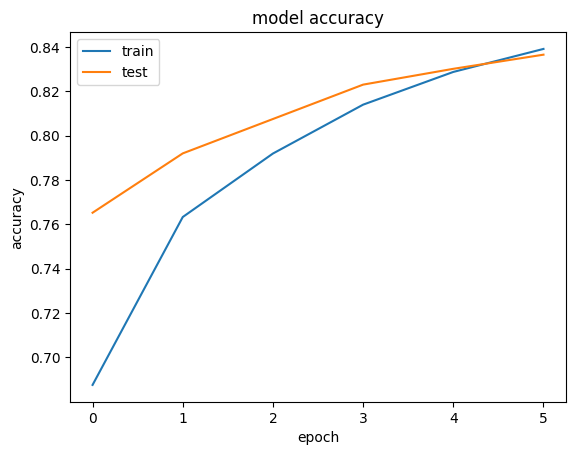

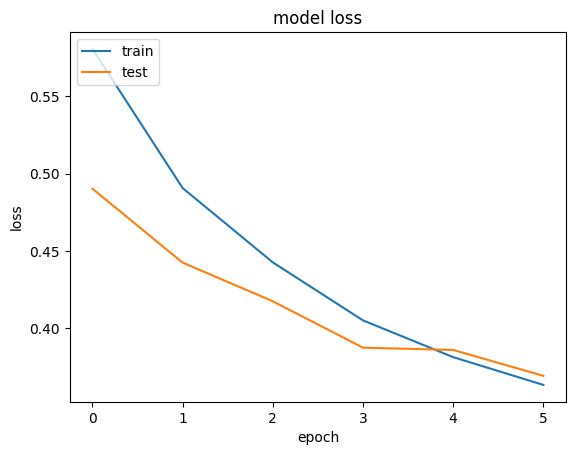

In [51]:
plot_history(history_LSTM)

## Comparaison des résultats des 3 modèles
|   Model  |     Test Score     |   Test Accuracy  |  
|:--------:|:------------------:|:----------------:|  
|  Model_LSTM |  0.3695564568042755 | 0.833299994468689 |  
|  Model_CNN |  0.39298632740974426|  0.8241999745368958 |  
|  Model_Simple | 0.5655431747436523 | 0.7213000059127808 |  

On remarque que le modele CNN et LSTM ont presque la meme test accuracy qui est très élevé par rapport au simple modele.  

In [52]:
# Choose a random instance
idx = np.random.randint(len(X_test))
instance = X_test[idx]
print(instance)
# Predict its class for the 3 models
prediction1 = model.predict(np.array([instance]))
prediction2 = model_CNN.predict(np.array([instance]))
prediction3 =model_LSTM.predict(np.array([instance]))
# Print the predicted class
print("Predicted class with simple model:",round(prediction1[0][0]))
print("Predicted class with CNN model:",round(prediction2[0][0]))
print("Predicted class with LSTM model:",round(prediction3[0][0]))


[  47   15   28 1181   32   66  186    4   61    1 1177    3  806    2
 4002 2005   48 3339  297 1247    9   10   24  146   40    8   58    9
  187   10   60  579   22 1292    2 2277    7 3315  109   60 3372    2
    6   94   70    9  288 4084   47  411   65   43   10 4084   10  218
   65   13    1   85  172 1202   82   97  227  118   99    8  169    2
   82   97    8   12  227   25    9  868   13  280   31  108 3315   15
  211   30 4010 1870  320    8  139   25   30  219   99   54 1194   13
    8 1957]
1/1 [==============================] - 0s 460ms/step
Predicted class with simple model: 1
Predicted class with CNN model: 1
Predicted class with LSTM model: 1


Les 3 modeles donnent la meme prediction de classes pour l'instance aléatoire

## D. Compte rendu :
On va continuer de travailler avec GloVe embeddings pour les 2 autres modeles.

Let's define first the functions that test each model against the embedding type to reduce the code :

In [67]:
def test_LSTM(embedding_matrix):
  model=Sequential()
  model.add(Embedding(vocab_size, 300, weights=[embedding_matrix],input_length=maxlen , trainable=False))
  model.add(LSTM(128))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
  history=model.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)
  evaluate(model)
  plot_history(history)

In [68]:
def test_GRU(embedding_matrix):
  model=Sequential()
  model.add(Embedding(vocab_size, 300, weights=[embedding_matrix],input_length=maxlen , trainable=False))
  model.add(GRU(128))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
  history=model.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)
  evaluate(model)
  plot_history(history)


In [69]:
def test_RNN_CNN(embedding_matrix):
  model=Sequential()
  model.add(Embedding(vocab_size, 300, weights=[embedding_matrix],input_length=maxlen , trainable=False))
  model.add(Conv1D(128,5,activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(LSTM(128))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
  history=model.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)
  evaluate(model)
  plot_history(history)

## GloVe


### LSTM

Epoch 1/6
250/250 [==============================] - 132s 510ms/step - loss: 0.5749 - acc: 0.6948 - val_loss: 0.5231 - val_acc: 0.7393
Epoch 2/6
250/250 [==============================] - 104s 415ms/step - loss: 0.4747 - acc: 0.7754 - val_loss: 0.4331 - val_acc: 0.7968
Epoch 3/6
250/250 [==============================] - 92s 370ms/step - loss: 0.4283 - acc: 0.8011 - val_loss: 0.3989 - val_acc: 0.8175
Epoch 4/6
250/250 [==============================] - 101s 404ms/step - loss: 0.4037 - acc: 0.8153 - val_loss: 0.3884 - val_acc: 0.8251
Epoch 5/6
250/250 [==============================] - 90s 362ms/step - loss: 0.3759 - acc: 0.8300 - val_loss: 0.3703 - val_acc: 0.8346
Epoch 6/6
313/313 [==============================] - 21s 67ms/step - loss: 0.3991 - acc: 0.8253
Test Score: 0.3990863263607025
Test Accuracy: 0.8252999782562256


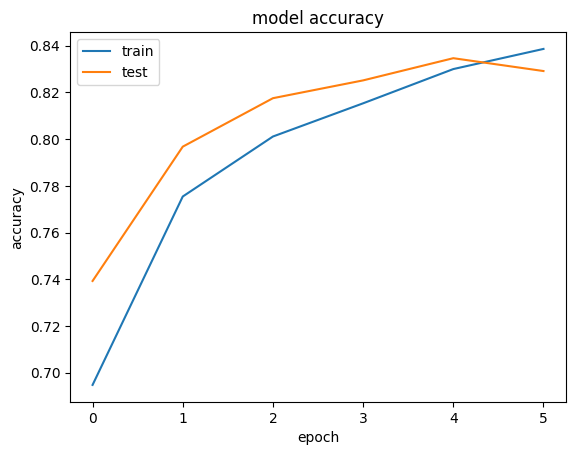

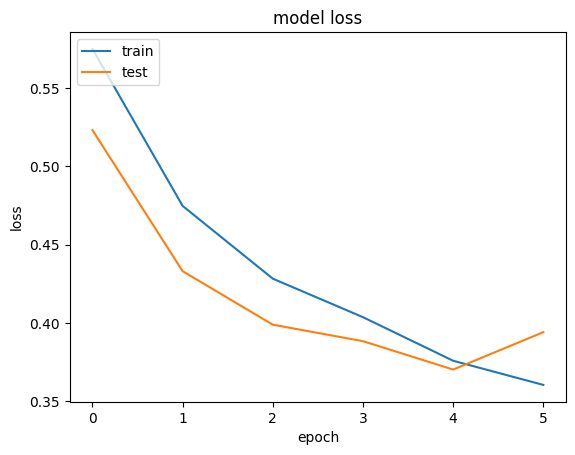

In [60]:
test_LSTM(embedding_matrix)

### GRU

Epoch 1/6
250/250 [==============================] - 77s 301ms/step - loss: 0.5522 - acc: 0.7028 - val_loss: 0.4331 - val_acc: 0.7993
Epoch 2/6
250/250 [==============================] - 82s 328ms/step - loss: 0.4295 - acc: 0.8013 - val_loss: 0.3935 - val_acc: 0.8195
Epoch 3/6
250/250 [==============================] - 80s 319ms/step - loss: 0.3935 - acc: 0.8198 - val_loss: 0.3863 - val_acc: 0.8236
Epoch 4/6
250/250 [==============================] - 80s 318ms/step - loss: 0.3714 - acc: 0.8317 - val_loss: 0.3867 - val_acc: 0.8240
Epoch 5/6
250/250 [==============================] - 79s 315ms/step - loss: 0.3515 - acc: 0.8432 - val_loss: 0.3558 - val_acc: 0.8399
Epoch 6/6
313/313 [==============================] - 11s 35ms/step - loss: 0.3486 - acc: 0.8432
Test Score: 0.34858015179634094
Test Accuracy: 0.8432000279426575


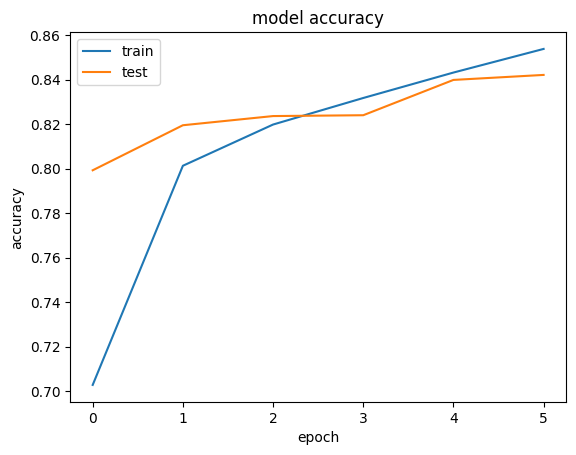

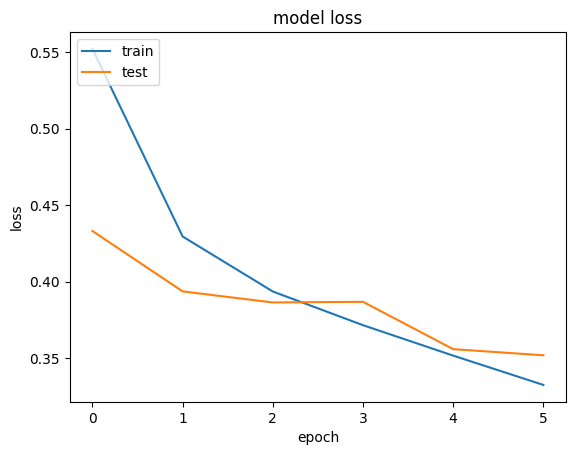

In [61]:
test_GRU(embedding_matrix)

### RNN_CNN

Epoch 1/6
250/250 [==============================] - 86s 335ms/step - loss: 0.5927 - acc: 0.6727 - val_loss: 0.4722 - val_acc: 0.7755
Epoch 2/6
250/250 [==============================] - 84s 337ms/step - loss: 0.4471 - acc: 0.7924 - val_loss: 0.4503 - val_acc: 0.7826
Epoch 3/6
250/250 [==============================] - 83s 331ms/step - loss: 0.3948 - acc: 0.8202 - val_loss: 0.4159 - val_acc: 0.8245
Epoch 4/6
250/250 [==============================] - 83s 333ms/step - loss: 0.3448 - acc: 0.8506 - val_loss: 0.3735 - val_acc: 0.8304
Epoch 5/6
250/250 [==============================] - 86s 345ms/step - loss: 0.3068 - acc: 0.8690 - val_loss: 0.4123 - val_acc: 0.8196
Epoch 6/6
313/313 [==============================] - 14s 45ms/step - loss: 0.4174 - acc: 0.8140
Test Score: 0.41740697622299194
Test Accuracy: 0.8140000104904175


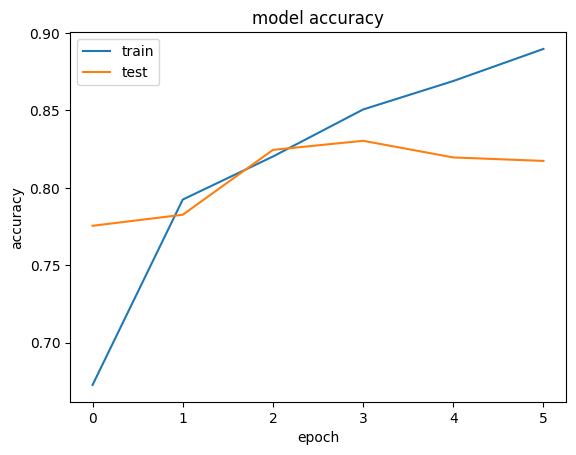

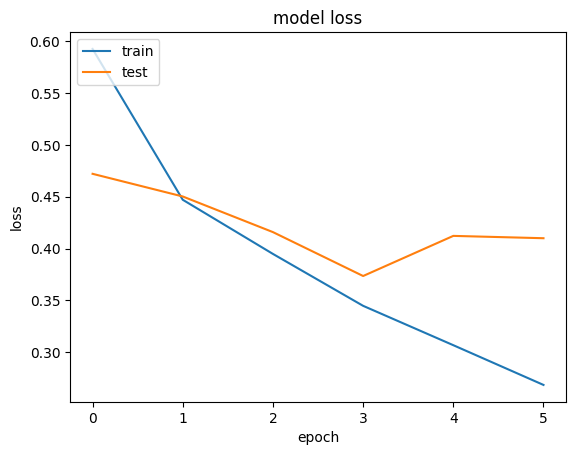

In [62]:
test_RNN_CNN(embedding_matrix)

## Wor2vec Embeddings

In [ ]:
# Downloading the word vectors from Google trained word2Vec model
!wget https://media.githubusercontent.com/media/eyaler/word2vec-slim/master/GoogleNews-vectors-negative300-SLIM.bin.gz

In [72]:
## Build the embedding matrix with Word2vec
word2vec_model = KeyedVectors.load_word2vec_format('/content/GoogleNews-vectors-negative300-SLIM.bin', binary=True)

embedding_matrix_wor2vec = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
  if word in word2vec_model:
    embedding_vector = word2vec_model[word]
  else :
    embedding_vector=None
  if embedding_vector is not None:
    embedding_matrix_wor2vec[i] = embedding_vector

### LSTM

Epoch 1/6
250/250 [==============================] - 167s 651ms/step - loss: 0.5484 - acc: 0.7053 - val_loss: 0.4107 - val_acc: 0.8091
Epoch 2/6
250/250 [==============================] - 145s 581ms/step - loss: 0.4287 - acc: 0.8031 - val_loss: 0.3991 - val_acc: 0.8151
Epoch 3/6
250/250 [==============================] - 139s 558ms/step - loss: 0.3963 - acc: 0.8213 - val_loss: 0.3774 - val_acc: 0.8251
Epoch 4/6
250/250 [==============================] - 133s 532ms/step - loss: 0.3788 - acc: 0.8303 - val_loss: 0.3560 - val_acc: 0.8460
Epoch 5/6
250/250 [==============================] - 151s 603ms/step - loss: 0.3674 - acc: 0.8371 - val_loss: 0.3417 - val_acc: 0.8537
Epoch 6/6
313/313 [==============================] - 28s 90ms/step - loss: 0.3396 - acc: 0.8507
Test Score: 0.33956846594810486
Test Accuracy: 0.8507000207901001


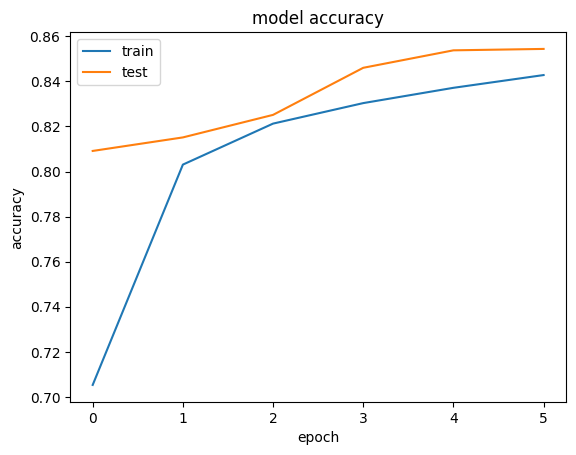

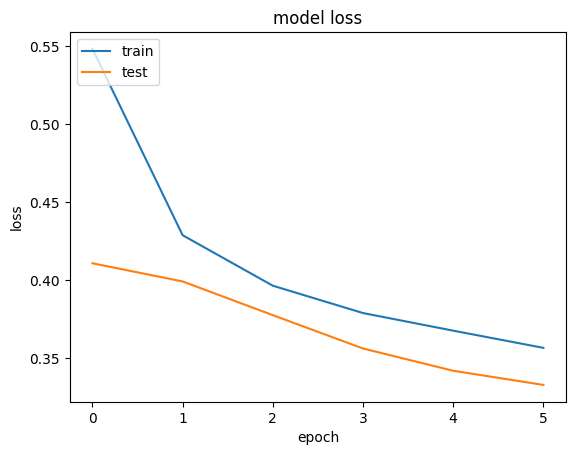

In [73]:
test_LSTM(embedding_matrix_wor2vec)

### GRU

Epoch 1/6
250/250 [==============================] - 103s 406ms/step - loss: 0.5436 - acc: 0.7133 - val_loss: 0.4098 - val_acc: 0.8170
Epoch 2/6
250/250 [==============================] - 103s 414ms/step - loss: 0.3973 - acc: 0.8184 - val_loss: 0.3614 - val_acc: 0.8404
Epoch 3/6
250/250 [==============================] - 101s 403ms/step - loss: 0.3593 - acc: 0.8393 - val_loss: 0.3455 - val_acc: 0.8511
Epoch 4/6
250/250 [==============================] - 103s 411ms/step - loss: 0.3440 - acc: 0.8478 - val_loss: 0.3379 - val_acc: 0.8525
Epoch 5/6
250/250 [==============================] - 99s 394ms/step - loss: 0.3324 - acc: 0.8531 - val_loss: 0.3408 - val_acc: 0.8509
Epoch 6/6
313/313 [==============================] - 24s 76ms/step - loss: 0.3229 - acc: 0.8590
Test Score: 0.3228991627693176
Test Accuracy: 0.859000027179718


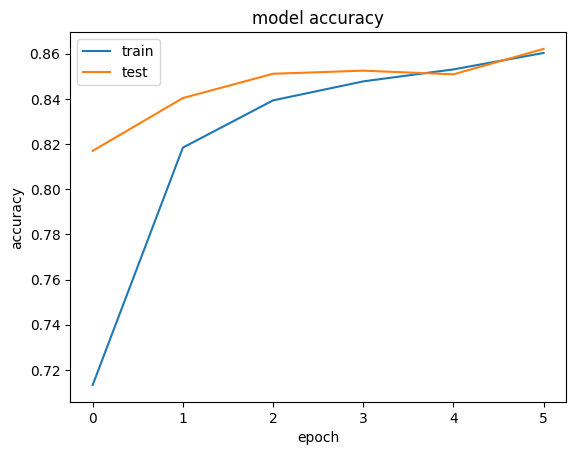

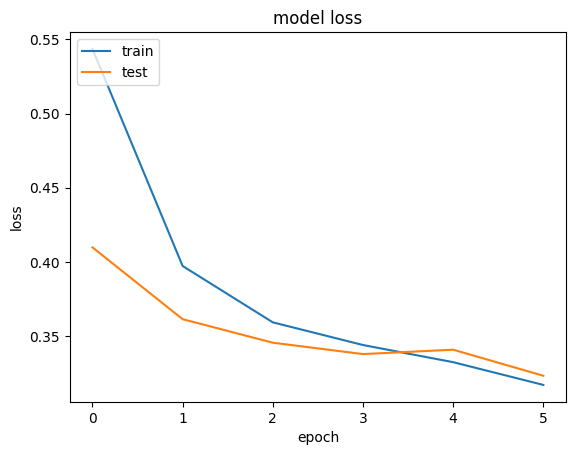

In [74]:
test_GRU(embedding_matrix_wor2vec)

### RNN_CNN

Epoch 1/6
250/250 [==============================] - 140s 550ms/step - loss: 0.4770 - acc: 0.7596 - val_loss: 0.3593 - val_acc: 0.8430
Epoch 2/6
250/250 [==============================] - 136s 543ms/step - loss: 0.3557 - acc: 0.8432 - val_loss: 0.3320 - val_acc: 0.8570
Epoch 3/6
250/250 [==============================] - 141s 563ms/step - loss: 0.3032 - acc: 0.8716 - val_loss: 0.3612 - val_acc: 0.8554
Epoch 4/6
250/250 [==============================] - 140s 560ms/step - loss: 0.2555 - acc: 0.8976 - val_loss: 0.3213 - val_acc: 0.8616
Epoch 5/6
250/250 [==============================] - 126s 503ms/step - loss: 0.2013 - acc: 0.9230 - val_loss: 0.3624 - val_acc: 0.8589
Epoch 6/6
313/313 [==============================] - 23s 73ms/step - loss: 0.3453 - acc: 0.8674
Test Score: 0.34531307220458984
Test Accuracy: 0.8673999905586243


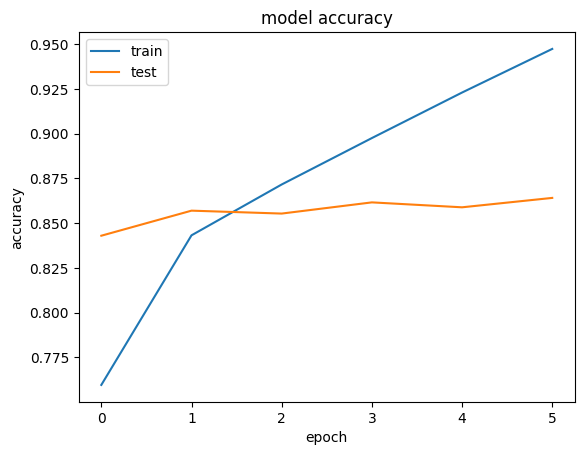

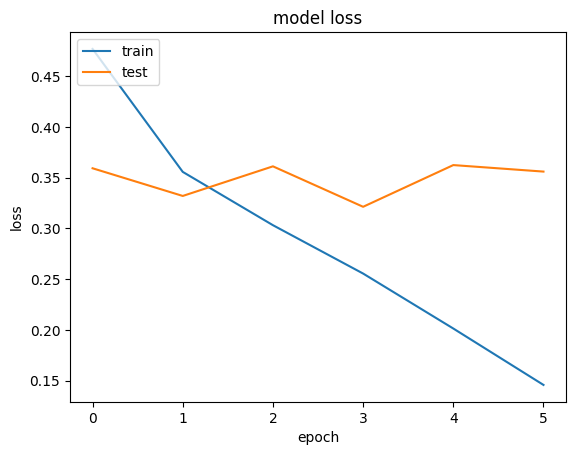

In [75]:
test_RNN_CNN(embedding_matrix_wor2vec)

## Fasttext Embeddings

In [ ]:
# Download the word vectors from Wiki Fasttext
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.vec

In [77]:
# Create the embeddings_dictionary from Fasttext (each word corresponds to a list of integers which is the embedding)
embeddings_dictionary = dict()
wiki_file = open("/content/wiki.en.vec", 'r', encoding='utf-8', newline='\n', errors='ignore')
for line in wiki_file:
    records = line.rstrip().split(' ')
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions

wiki_file.close()


In [79]:
embedding_matrix_ft = np.zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix_ft[index] = embedding_vector
embedding_matrix_ft

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.065334  , -0.093031  , -0.017571  , ...,  0.16642   ,
        -0.13079   ,  0.035397  ],
       [-0.031533  ,  0.046278  , -0.12534   , ...,  0.11163   ,
        -0.058231  ,  0.011977  ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.056858  ,  0.27686   , -0.031354  , ...,  0.68206   ,
         0.30813   ,  0.58231997],
       [ 0.40314999, -0.13091999, -0.33791   , ...,  0.22762001,
         0.40819001,  0.17526001]])

### LSTM

Epoch 1/6
250/250 [==============================] - 205s 803ms/step - loss: 0.5118 - acc: 0.7461 - val_loss: 0.4131 - val_acc: 0.8173
Epoch 2/6
250/250 [==============================] - 193s 774ms/step - loss: 0.4199 - acc: 0.8076 - val_loss: 0.4452 - val_acc: 0.8096
Epoch 3/6
250/250 [==============================] - 184s 736ms/step - loss: 0.3910 - acc: 0.8228 - val_loss: 0.3569 - val_acc: 0.8399
Epoch 4/6
250/250 [==============================] - 212s 850ms/step - loss: 0.3570 - acc: 0.8435 - val_loss: 0.3547 - val_acc: 0.8462
Epoch 5/6
250/250 [==============================] - 189s 757ms/step - loss: 0.3307 - acc: 0.8562 - val_loss: 0.3446 - val_acc: 0.8487
Epoch 6/6
313/313 [==============================] - 36s 114ms/step - loss: 0.3240 - acc: 0.8558
Test Score: 0.32403454184532166
Test Accuracy: 0.8557999730110168


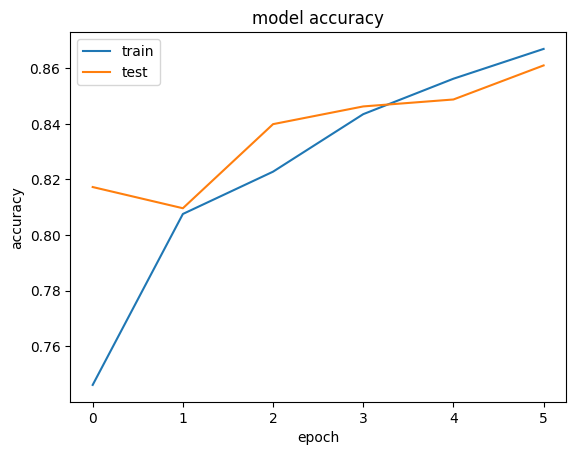

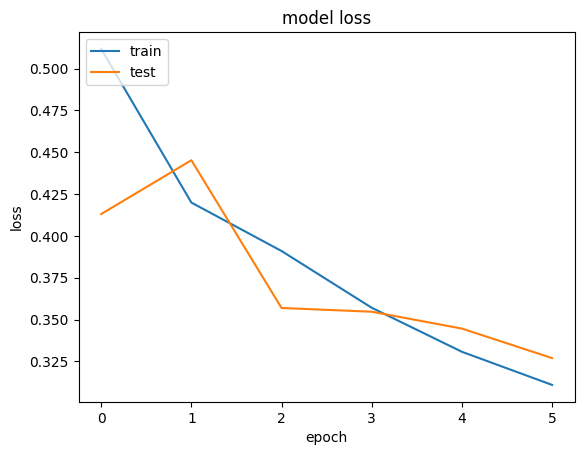

In [80]:
test_LSTM(embedding_matrix_ft)

### GRU

Epoch 1/6
250/250 [==============================] - 212s 807ms/step - loss: 0.4986 - acc: 0.7486 - val_loss: 0.3848 - val_acc: 0.8267
Epoch 2/6
250/250 [==============================] - 165s 660ms/step - loss: 0.3689 - acc: 0.8343 - val_loss: 0.3742 - val_acc: 0.8381
Epoch 3/6
250/250 [==============================] - 160s 640ms/step - loss: 0.3345 - acc: 0.8543 - val_loss: 0.3345 - val_acc: 0.8551
Epoch 4/6
250/250 [==============================] - 137s 548ms/step - loss: 0.3151 - acc: 0.8655 - val_loss: 0.3187 - val_acc: 0.8645
Epoch 5/6
250/250 [==============================] - 152s 610ms/step - loss: 0.3010 - acc: 0.8715 - val_loss: 0.3195 - val_acc: 0.8654
Epoch 6/6
313/313 [==============================] - 34s 108ms/step - loss: 0.3248 - acc: 0.8562
Test Score: 0.3248409926891327
Test Accuracy: 0.8561999797821045


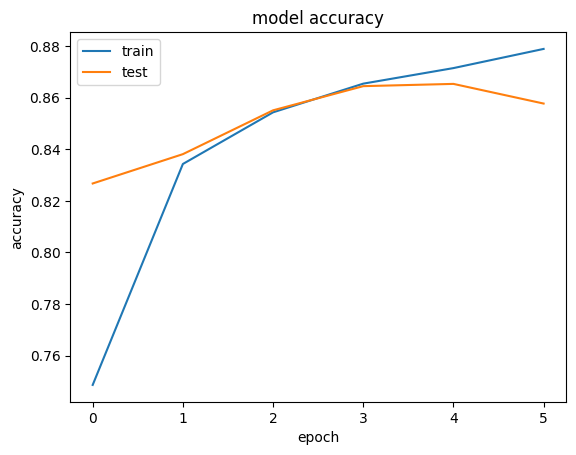

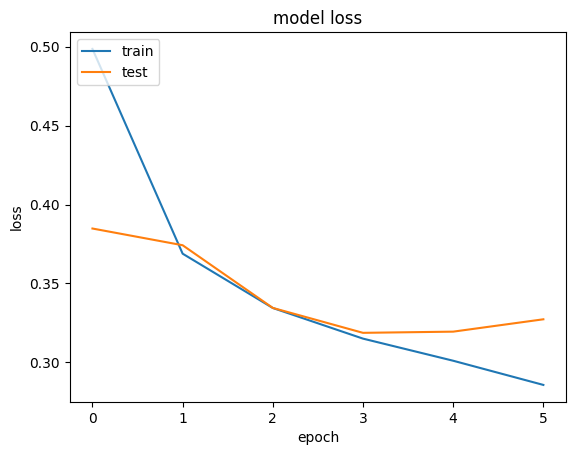

In [83]:
test_GRU(embedding_matrix_ft)

### RNN_CNN

Epoch 1/6
250/250 [==============================] - 174s 676ms/step - loss: 0.4852 - acc: 0.7548 - val_loss: 0.3806 - val_acc: 0.8416
Epoch 2/6
250/250 [==============================] - 187s 747ms/step - loss: 0.3561 - acc: 0.8428 - val_loss: 0.3495 - val_acc: 0.8515
Epoch 3/6
250/250 [==============================] - 193s 771ms/step - loss: 0.3059 - acc: 0.8701 - val_loss: 0.3224 - val_acc: 0.8618
Epoch 4/6
250/250 [==============================] - 188s 752ms/step - loss: 0.2613 - acc: 0.8923 - val_loss: 0.3284 - val_acc: 0.8626
Epoch 5/6
250/250 [==============================] - 172s 687ms/step - loss: 0.2239 - acc: 0.9103 - val_loss: 0.3609 - val_acc: 0.8494
Epoch 6/6
313/313 [==============================] - 26s 83ms/step - loss: 0.3828 - acc: 0.8528
Test Score: 0.3827988803386688
Test Accuracy: 0.8528000116348267


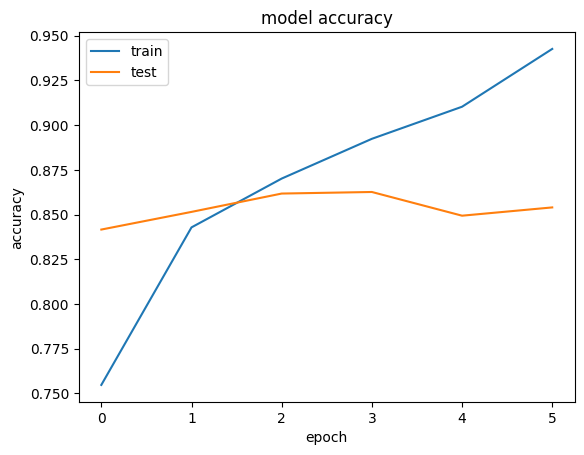

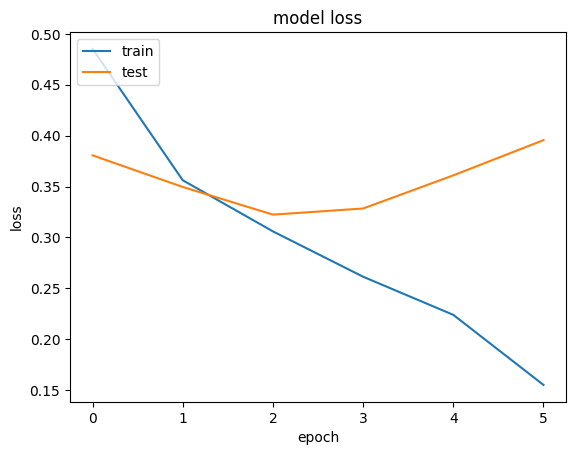

In [82]:
test_RNN_CNN(embedding_matrix_ft)

## Tf-idf Embeddings

Using TF-IDF embeddings involves a different process compared to Word2Vec or GloVe embeddings. TF-IDF stands for Term Frequency - Inverse Document Frequency. It is a statistical measure used to evaluate the importance of a word in a document, which is part of a corpus.


In [11]:
# we must make again the test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.20, random_state=42)


vectorizer = TfidfVectorizer()
X_train_tf = vectorizer.fit_transform(X_train)
X_test_tf = vectorizer.transform(X_test)

### LSTM




In [ ]:
lstm_model = Sequential()
lstm_model.add(Dense(64, activation='relu', input_shape=(X_train_tf.shape[1],)))
lstm_model.add(Reshape((64, 1)))  # Add an additional dimension because LSTM requires 3 dimensional input
lstm_model.add(LSTM(128))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile your model
lstm_model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

# Train your model
lstm_history = lstm_model.fit(X_train_tf.toarray(), y_train, epochs=6,batch_size=128,verbose=1,validation_split=0.2)


In [103]:
score = lstm_model.evaluate(X_test_tf.toarray(), y_test, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 20s 62ms/step - loss: 0.3431 - acc: 0.8493
Test score: 0.34310832619667053
Test accuracy: 0.8493000268936157


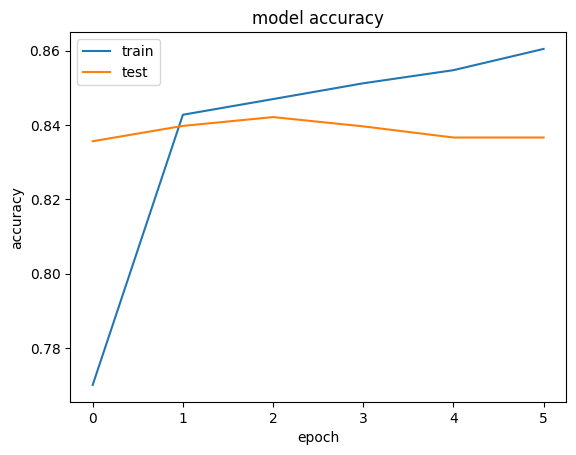

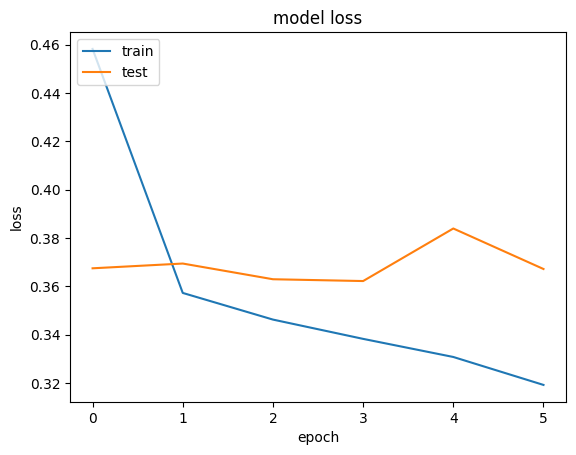

In [104]:
plot_history(lstm_history)

### GRU

In [105]:
gru_model = Sequential()
gru_model.add(Dense(64, activation='relu', input_shape=(X_train_tf.shape[1],)))
gru_model.add(Reshape((64, 1)))  # Add an additional dimension

gru_model.add(GRU(128))
gru_model.add(Dense(1, activation='sigmoid'))

# Compile your model
gru_model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

# Train your model
gru_history = gru_model.fit(X_train_tf.toarray(), y_train, epochs=6,batch_size=128,verbose=1,validation_split=0.2)


Epoch 1/6
250/250 [==============================] - 93s 285ms/step - loss: 0.5172 - acc: 0.7352 - val_loss: 0.3729 - val_acc: 0.8301
Epoch 2/6
250/250 [==============================] - 71s 286ms/step - loss: 0.3593 - acc: 0.8411 - val_loss: 0.3637 - val_acc: 0.8399
Epoch 3/6
250/250 [==============================] - 56s 225ms/step - loss: 0.3494 - acc: 0.8476 - val_loss: 0.3612 - val_acc: 0.8400
Epoch 4/6
250/250 [==============================] - 71s 284ms/step - loss: 0.3450 - acc: 0.8486 - val_loss: 0.3622 - val_acc: 0.8376
Epoch 5/6
250/250 [==============================] - 74s 297ms/step - loss: 0.3367 - acc: 0.8510 - val_loss: 0.3637 - val_acc: 0.8394
Epoch 6/6
250/250 [==============================] - 73s 291ms/step - loss: 0.3277 - acc: 0.8533 - val_loss: 0.3766 - val_acc: 0.8319


In [106]:
score = gru_model.evaluate(X_test_tf.toarray(), y_test, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 11s 35ms/step - loss: 0.3539 - acc: 0.8434
Test score: 0.3538862466812134
Test accuracy: 0.8434000015258789


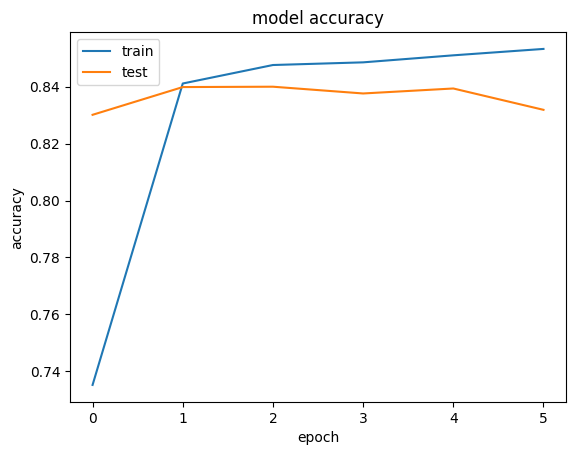

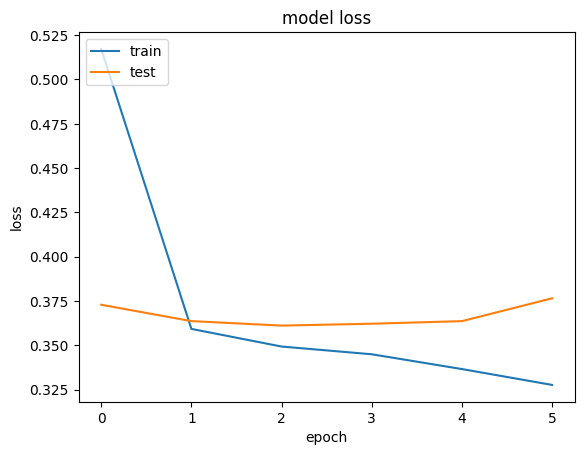

In [107]:
plot_history(gru_history)

### RNN_CNN

In [111]:
cnn_rnn_model = Sequential()
cnn_rnn_model.add(Dense(64, activation='relu', input_shape=(X_train_tf.shape[1],)))
cnn_rnn_model.add(Reshape((64, 1)))  # Add an additional dimension
cnn_rnn_model.add(Conv1D(128,5,activation='relu'))
cnn_rnn_model.add(MaxPooling1D(pool_size=2))
cnn_rnn_model.add(LSTM(128))
cnn_rnn_model.add(Dense(1,activation='sigmoid'))

# Compile your model
cnn_rnn_model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

# Train your model
cnn_rnn_history = cnn_rnn_model.fit(X_train_tf.toarray(), y_train, epochs=6,batch_size=128,verbose=1,validation_split=0.2)


Epoch 1/6
250/250 [==============================] - 116s 441ms/step - loss: 0.4337 - acc: 0.7859 - val_loss: 0.3786 - val_acc: 0.8305
Epoch 2/6
250/250 [==============================] - 63s 254ms/step - loss: 0.3504 - acc: 0.8467 - val_loss: 0.3698 - val_acc: 0.8381
Epoch 3/6
250/250 [==============================] - 65s 262ms/step - loss: 0.3365 - acc: 0.8550 - val_loss: 0.3671 - val_acc: 0.8372
Epoch 4/6
250/250 [==============================] - 62s 250ms/step - loss: 0.3166 - acc: 0.8652 - val_loss: 0.3826 - val_acc: 0.8334
Epoch 5/6
250/250 [==============================] - 63s 253ms/step - loss: 0.2901 - acc: 0.8797 - val_loss: 0.3896 - val_acc: 0.8305
Epoch 6/6
250/250 [==============================] - 59s 237ms/step - loss: 0.2518 - acc: 0.9007 - val_loss: 0.4075 - val_acc: 0.8263


In [112]:
score = cnn_rnn_model.evaluate(X_test_tf.toarray(), y_test, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 12s 36ms/step - loss: 0.3770 - acc: 0.8378
Test score: 0.3769965171813965
Test accuracy: 0.8378000259399414


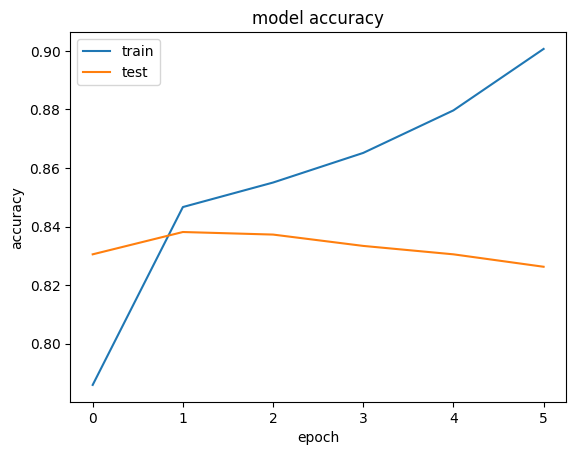

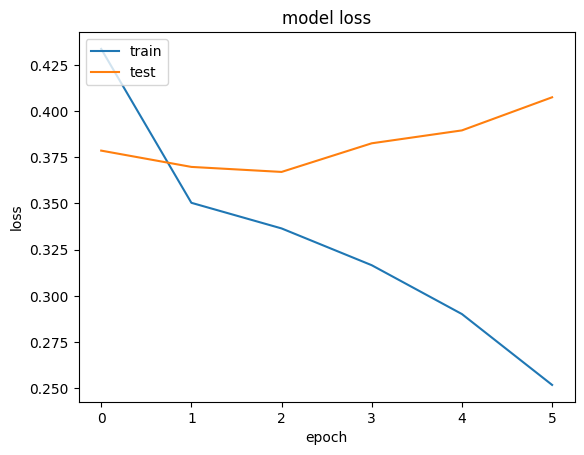

In [113]:
plot_history(cnn_rnn_history)

|            | GloVe | Word2Vec | FastText | TF-IDF |  
|------------|:-----:|:--------:|:--------:|:------:|  
| LSTM       | 0.825  |0.850    | 0.855     | 0.849     |  
| GRU        | 0.843   | 0.859      | 0.856     | 0.843     |  
| RNN + CNN  | 0.814   | 0.867      | 0.852      | 0.837     |  



- pour les modèles on remarque que GRU est le plus performant selon l'accuracy et aussi d'après les courbes de training on peut voir qu'il a le meilleur courbe (n'admet pas d'overfitting).

- On remarque aussi que le modele RNN+CNN a un surapprentissage claire d'après la courbe d'entrainement la plupart des types d'Embeddings.
- Pour les Embeddings on remarque Word2Vec et FastText sont les meilleurs pour cette tache.
- On remarque aussi que chaque type d'Embedding performe mieux avec un modele different.